# Decision Trees: Flags
This project uses decision trees to predict which continent a particular flag (based on its characteristics) comes from. 
NOTE: This project is based on Codecademy's [Flags project](https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-i/tracks/dsmlcj-22-supervised-learning-i/modules/mle-decision-trees-8b27e5b3-0352-4887-a8e5-e4a507597ad5-fc6f7fa3-d862-4a3c-9a50-e939437fdd97/projects/mlfun-decision-trees-project).

## Dataset
The dataset used in from the UCI Machine Learning Repository: [Flags](https://archive.ics.uci.edu/dataset/40/flags). "Additional Variable Information" provides further information about the columns and what the values mean (e.g. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania). 

"Flags," UCI Machine Learning Repository, 1990. [Online]. Available: https://doi.org/10.24432/C52C7Z.

## Setup and Import

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [30]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("flag.data", names = cols)

df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


## Brief Data Exploration
The data will be explored, so that it is well-understood how to prepare the data, the datatypes are well characterized, etc.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [32]:
#Print number of countries by landmass, or continent
print(df.landmass.value_counts())

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64


## Data Preparation
The data will be pre-processed into training and testing sets to be inputted to a machine learning algorithm. To reduce complexity from multiclass to binary classification, only flags from Europe and Oceania will be used.

In [33]:
# create a new dataframe with only flags from Europe (3) and Oceania (6)
df_36 = df[df.landmass.isin([3, 6])]

In [34]:
# variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

# create labels
labels = df_36["landmass"]

# create feature set, including dummy variables for the categorial data 
data = pd.get_dummies(df_36[var])

In [35]:
#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=1, test_size=.4)

## Decision Tree (and hyperparameter optimizatoin)
A decision tree is created and fit to the data. 

## Hyperparameter: Depth
The hyperparameter of depth is manually explored to find the best value between 1-20. Results are plotted, and the best model is saved. 

In [36]:
# create and fit a decision tree for max_depth values 1-20; save the accuracy scores
depths = range(1, 21)
acc_depth = []

for i in depths:
  dtc = DecisionTreeClassifier(max_depth=i, random_state = 10)
  dtc.fit(x_train, y_train)
  acc_depth.append(dtc.score(x_test, y_test))

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f"Highest accuracy {np.round(max_acc, 3)} occurs at depth {best_depth}")

Highest accuracy 0.727 occurs at depth 5


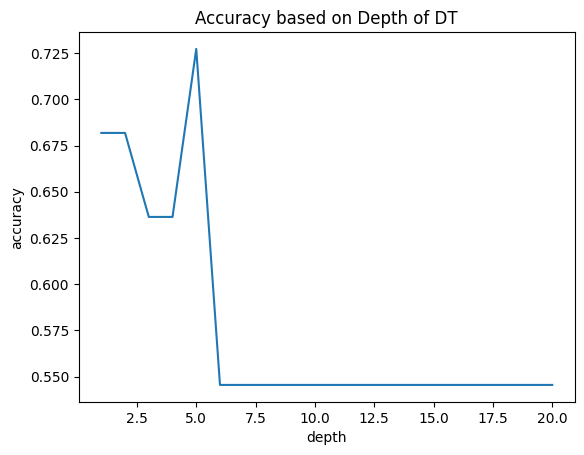

In [37]:
# plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.title("Accuracy based on Depth of DT")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.show()

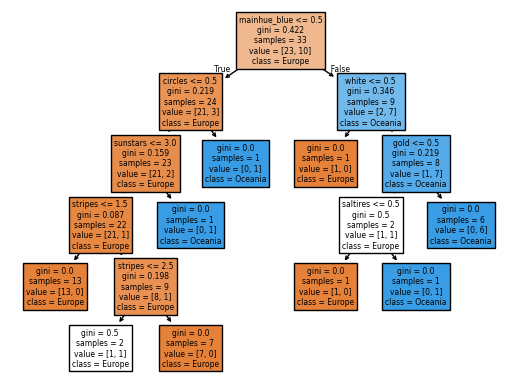

In [38]:
# refit decision tree model with the highest accuracy
dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=10)
dtc.fit(x_train, y_train)
tree.plot_tree(dtc, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], filled=True) # plot the tree
plt.show()

### Hyperparameter: Pruning
The hyperparameter of degree of pruning is manually explored. Results are plotted, and the best model is saved. 

Highest accuracy 0.773 occurs at ccp_alpha 0.0379269019073225


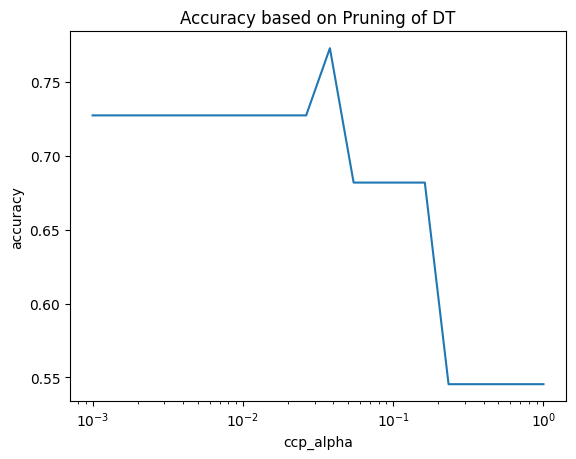

In [39]:
# create and fit a decision tree for pruning values; save the accuracy scores
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dtc = DecisionTreeClassifier(random_state=10, max_depth=best_depth, ccp_alpha=i)
    dtc.fit(x_train, y_train)
    acc_pruned.append(dtc.score(x_test, y_test))

# find the largest accuracy and the ccp value this occurs
max_acc = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]
print(f"Highest accuracy {np.round(max_acc, 3)} occurs at ccp_alpha {best_ccp}")

# plot the accuracy vs ccp_alpha
plt.plot(ccp, acc_pruned)
plt.title("Accuracy based on Pruning of DT")
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

### Overall best tree
The best tree, with optimized depth and pruning, is given. 

The best model is achieved with depth 5 and pruning 0.0379, giving an overall score of 0.7727


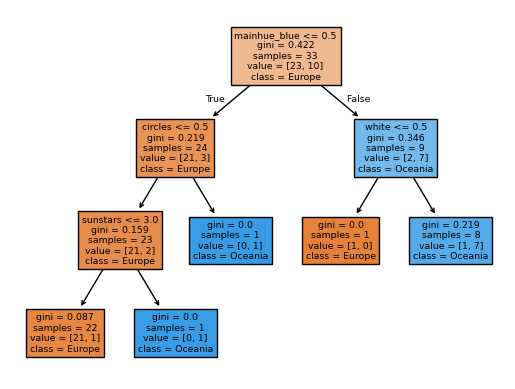

In [41]:
# create and fit the decision tree model with the values for max_depth and ccp_alpha found above
dtc = DecisionTreeClassifier(random_state=10, max_depth=best_depth, ccp_alpha=best_ccp)
dtc.fit(x_train, y_train)
print(f"The best model is achieved with depth {best_depth} and pruning {best_ccp:.4f}, giving an overall score of {dtc.score(x_test, y_test):.4f}")

# plot the final decision tree
tree.plot_tree(dtc, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], filled=True)
plt.show()